# Cops and robber in a DAG

You are given a directed acyclic graph (DAG) $G$ with $n$ vertices and $m$ edges, a number $B$ and real vectors $x^{\text{max}}\in \mathbb{R}^m$, $a\in \mathbb{R}^m$. A robber wants to get from vertex 1 to vertex $n$. The cops want to prevent it, by assigning $x_e \in [0, x^{\text{max}}_e]$ of resources to every edge $e\in E(G)$. Then, the probability that the robber safely goes through any edge $e$ is $\exp(-a_ex_e)$, independently for every edge. Moreover, $B$ is the upper bound on the total amount of cops' resources, i.e., $\sum_e x_e \le B$. Find the assignment of resources that minimizes $p^\star$, where $p^\star$ is the maximum probability that the robber travels safely from 1 to $n$, over all paths in the DAG. Compare $p^\star$ with the probability obtained for the uniform distribution of police's resources.

(This exercise is inspired by the collection *Additional Exercises for Convex Optimization* by Boyd and Vandenberghe, used under permission.)

In [12]:
import numpy as np

In [13]:
np.random.seed(123)
n = 10
m = 20
B = m / 2
edges = np.array([[1,1,1,2,2,2,3,3,4,4,5,5,6,6,7,7,8,7,8,9],[2,3,4,6,3,4,5,6,6,7,8,7,7,8,8,9,9,10,10,10]]).T-1
edges

array([[0, 1],
       [0, 2],
       [0, 3],
       [1, 5],
       [1, 2],
       [1, 3],
       [2, 4],
       [2, 5],
       [3, 5],
       [3, 6],
       [4, 7],
       [4, 6],
       [5, 6],
       [5, 7],
       [6, 7],
       [6, 8],
       [7, 8],
       [6, 9],
       [7, 9],
       [8, 9]])

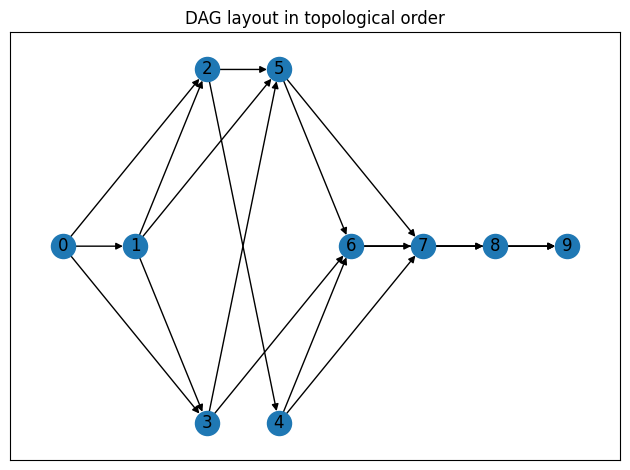

In [14]:
import networkx as nx
from matplotlib import pyplot as plt
G = nx.DiGraph()
G.add_edges_from(edges)

for layer, nodes in enumerate(nx.topological_generations(G)):
    # `multipartite_layout` expects the layer as a node attribute, so add the
    # numeric layer value as a node attribute
    for node in nodes:
        G.nodes[node]["layer"] = layer

# Compute the multipartite_layout using the "layer" node attribute
pos = nx.multipartite_layout(G, subset_key="layer")

fig, ax = plt.subplots()
nx.draw_networkx(G, pos=pos, ax=ax)
ax.set_title("DAG layout in topological order")
fig.tight_layout()
plt.show()

In [36]:
a = 2 * np.random.rand(m,1)
x_max = 1 + np.random.rand(m)